In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [21]:
df = pd.read_parquet("/content/drive/MyDrive/UC Berkeley/Capstone Project/df_with_all_sentiments.parquet")
df_daily = pd.read_parquet("/content/drive/MyDrive/UC Berkeley/Capstone Project/dataset2_daily_unweighted.parquet")
df_daily_weighted = pd.read_parquet("/content/drive/MyDrive/UC Berkeley/Capstone Project/dataset3_daily_weighted.parquet")

In [22]:
df.head()

,score,comms_num,Date,Net_Movement,Direction,text,text_clean,word_count,stopword_count,avg_word_length,...,emo_love,emo_nervousness,emo_optimism,emo_pride,emo_realization,emo_relief,emo_remorse,emo_sadness,emo_surprise,emo_neutral
0,55,6,2021-01-28,-17.849998,down,"It's not about the money, it's about sending a...",its not about the money its about sending a me...,11,7,6.909091,...,0.000395,0.000347,0.003786,0.000338,0.025970,0.000930,0.000265,0.001462,0.000409,0.788165
1,110,23,2021-01-28,-17.849998,down,Math Professor Scott Steiner says the numbers ...,math professor scott steiner says the numbers ...,12,2,5.750000,...,0.001016,0.002071,0.006149,0.000386,0.012732,0.000887,0.001552,0.015905,0.001663,0.475270
2,0,47,2021-01-28,-17.849998,down,Exit the system The CEO of NASDAQ pushed to ha...,exit the system the ceo of nasdaq pushed to ha...,227,110,4.158590,...,0.000307,0.000876,0.015613,0.000340,0.070062,0.000682,0.001018,0.003567,0.002530,0.770962
3,29,74,2021-01-28,-17.849998,down,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,new sec filing for gme can someone less retard...,13,4,4.692308,...,0.001204,0.000335,0.002921,0.000206,0.004792,0.000314,0.000455,0.002102,0.000478,0.955396
4,71,156,2021-01-28,-17.849998,down,"Not to distract from GME, just thought our AMC...",not to distract from gme just thought our amc ...,15,9,4.266667,...,0.000493,0.000661,0.006830,0.000467,0.074407,0.000985,0.000708,0.001480,0.000847,0.908539


In [23]:
df_daily.head()

,Date,Direction,Net_Movement,post_count,score_mean,comms_num_mean,word_count_mean,stopword_count_mean,avg_word_length_mean,emoji_count_mean,...,emo_love_std,emo_nervousness_std,emo_optimism_std,emo_pride_std,emo_realization_std,emo_relief_std,emo_remorse_std,emo_sadness_std,emo_surprise_std,emo_neutral_std
0,2021-01-28,down,-17.849998,1197,960.609023,142.193818,60.350042,27.286550,4.965890,1.566416,...,0.096203,0.005489,0.073438,0.024271,0.045126,0.005594,0.028983,0.056595,0.045444,0.321083
1,2021-01-29,down,-13.677498,15694,408.457309,52.371288,41.500765,18.703326,5.381931,1.417166,...,0.089649,0.020938,0.078240,0.015430,0.040625,0.005180,0.044060,0.058623,0.031777,0.326225
2,2021-02-01,down,-22.889999,884,4230.302036,531.211538,137.957014,62.556561,5.822523,2.869910,...,0.143675,0.008182,0.101990,0.005699,0.069253,0.003975,0.048728,0.051646,0.015784,0.325438
3,2021-02-02,down,-12.689999,1502,786.005326,101.698402,84.655792,37.513981,6.290613,2.080559,...,0.146784,0.017895,0.083965,0.004738,0.045545,0.004675,0.037862,0.072166,0.038117,0.326865
4,2021-02-03,down,-4.900000,2643,983.322361,128.741203,72.058267,32.610291,6.003130,1.805902,...,0.127497,0.019084,0.095339,0.011414,0.034617,0.005744,0.062403,0.097484,0.030577,0.337550


In [24]:
df_daily_weighted.head()

,Date,Direction,Net_Movement,post_count,score_mean,comms_num_mean,word_count_mean,stopword_count_mean,avg_word_length_mean,emoji_count_mean,...,emo_love_wstd,emo_nervousness_wstd,emo_optimism_wstd,emo_pride_wstd,emo_realization_wstd,emo_relief_wstd,emo_remorse_wstd,emo_sadness_wstd,emo_surprise_wstd,emo_neutral_wstd
0,2021-01-28,down,-17.849998,1197,960.609023,142.193818,60.350042,27.286550,4.965890,1.566416,...,0.085783,0.009244,0.018792,0.056134,0.041631,0.009927,0.005894,0.020622,0.020550,0.356432
1,2021-01-29,down,-13.677498,15694,408.457309,52.371288,41.500765,18.703326,5.381931,1.417166,...,0.086652,0.003906,0.056849,0.066795,0.039079,0.009474,0.029464,0.107542,0.010559,0.337330
2,2021-02-01,down,-22.889999,884,4230.302036,531.211538,137.957014,62.556561,5.822523,2.869910,...,0.142360,0.002784,0.070190,0.002415,0.068614,0.007119,0.020874,0.026826,0.004434,0.335502
3,2021-02-02,down,-12.689999,1502,786.005326,101.698402,84.655792,37.513981,6.290613,2.080559,...,0.136207,0.009165,0.102615,0.002893,0.037062,0.002333,0.013691,0.045795,0.026117,0.330539
4,2021-02-03,down,-4.900000,2643,983.322361,128.741203,72.058267,32.610291,6.003130,1.805902,...,0.066146,0.010461,0.048435,0.011418,0.017332,0.003793,0.098588,0.061559,0.016161,0.345298


Section 1:

This dual-axis time series chart shows GME's daily net price movement as a bar chart with green bars for up days and red bars for down days. The daily volume of posts on r/wallstreetbets is overlayed as the blue line. The chart spans from January 28 to March 31, 2021. The histogram below shows the distribution of daily post counts across the 44 trading days. These charts show the relationship between stock price and community engagement over time.

The most notable feature is the spike in Reddit activity on January 28/29. The spike coincides with the peak of the short squeeze. During this time, the activity on r/wallstreetbets and its effect on GameStop's stock price got considerable media attention, and users flocked to the subreddit. After this, activity returned to a normal baseline for the rest of the period.

Importantly, post volume appears to trail price movement rather than lead it. Activity increases after large price swings, suggesting that the community was largely reactive rather than predictive during this period. The post volume distribution is heavily right-skewed, with 37 of 44 days seeing fewer than 1,000 posts while January 29 alone accounts for nearly 16,000 posts (approximately 44% of all data). This means, at the post level, nearly half the training data comes from a single day. This could bias classifiers toward that day's patterns rather than learning generalizable sentiment-price relationships. I seek to overcome this by aggrigating the data by day.

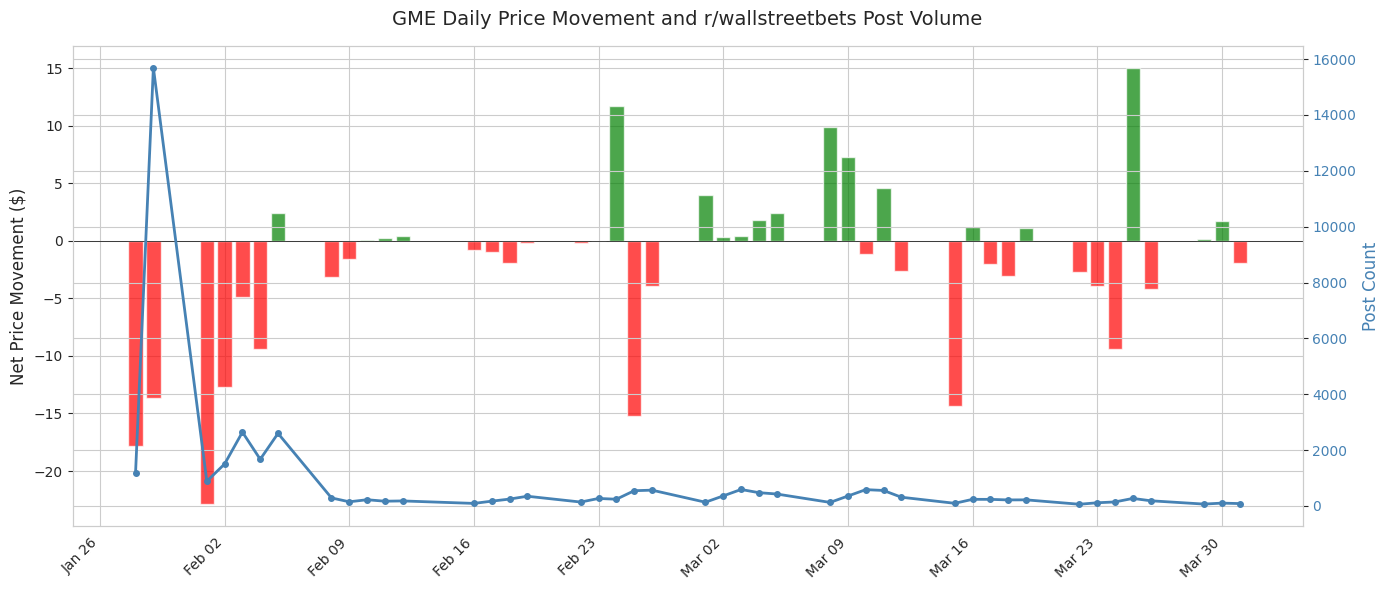

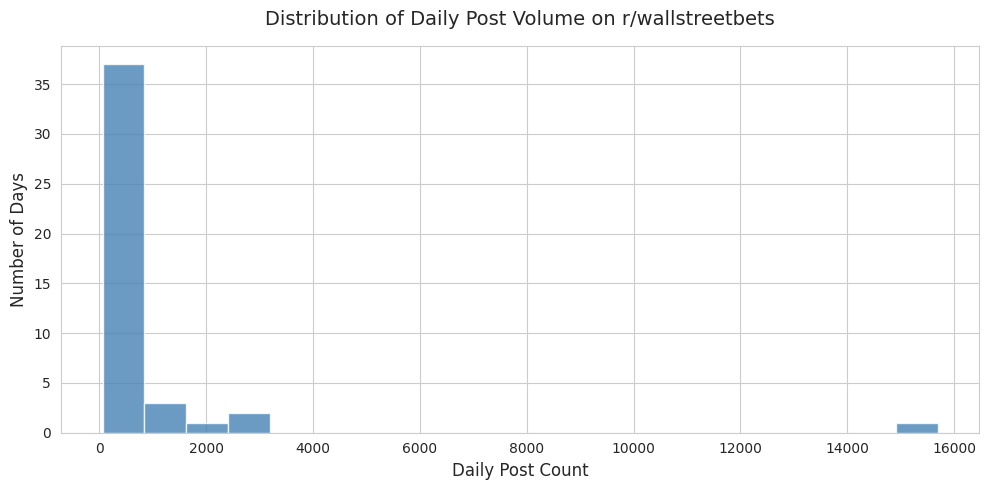

In [25]:
# Section 1

sns.set_style("whitegrid")
# Dual-axis time series — Price movement + Post volume
fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar chart: Net price movement colored by direction
colors = ["green" if x > 0 else "red" for x in df_daily["Net_Movement"]]
ax1.bar(df_daily["Date"], df_daily["Net_Movement"], color=colors, alpha=0.7, width=0.8)
ax1.set_ylabel("Net Price Movement ($)", fontsize=12)
ax1.set_xlabel("")
ax1.axhline(y=0, color="black", linewidth=0.5)

# Line plot: Post volume on secondary axis
ax2 = ax1.twinx()
ax2.plot(df_daily["Date"], df_daily["post_count"], color="steelblue", linewidth=2, marker="o", markersize=4)
ax2.set_ylabel("Post Count", fontsize=12, color="steelblue")
ax2.tick_params(axis="y", labelcolor="steelblue")

# Formatting
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right")

plt.title("GME Daily Price Movement and r/wallstreetbets Post Volume", fontsize=14, pad=15)
fig.tight_layout()
plt.show()


# Plot 2: Post volume distribution
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df_daily["post_count"], bins=20, color="steelblue", edgecolor="white", alpha=0.8)
ax.set_xlabel("Daily Post Count", fontsize=12)
ax.set_ylabel("Number of Days", fontsize=12)
ax.set_title("Distribution of Daily Post Volume on r/wallstreetbets", fontsize=14, pad=15)

fig.tight_layout()
plt.show()

Section 2:

This dual bar chart compares the class distribution of the net price movement (up vs. down) at the post level and the daily level. At the post level, the classes are imbalanced, with 79.5% of posts labeled "down" and 20.5% labeled "up." However, at the daily level, the split is more even with 59.1% down and 40.9% up. The apparent 80/20 imbalance is an artifact of high-volume down days (particularly January 28/29) contributing disproportionately more posts in the "down" class. This method critically diverges from the reference paper. The classifiers trained on post-level data were likely biased toward predicting "down" simply because that class dominated the training data. At the daily level, the 59/41 split is more reasonable for training classifiers without aggressive class weighting. This presents a more true representation of the underlying prediction task. To varify this, I will train classifiers on both the post-level and daily data and compare their performance.


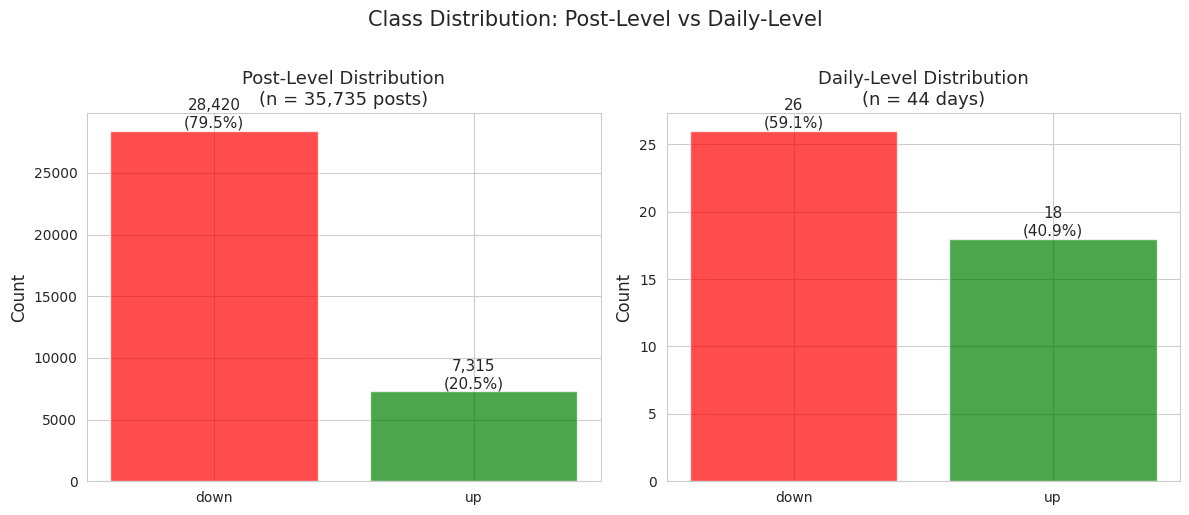

In [26]:
# Section 2

# Direction Class Balance — Post-Level vs Daily-Level
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Post-level distribution
post_counts = df["Direction"].value_counts()
post_pcts = df["Direction"].value_counts(normalize=True) * 100
bars1 = ax1.bar(
    ["down", "up"],
    [post_counts["down"], post_counts["up"]],
    color=["red", "green"],
    alpha=0.7,
    edgecolor="white"
)
ax1.set_title("Post-Level Distribution\n(n = 35,735 posts)", fontsize=13)
ax1.set_ylabel("Count", fontsize=12)
for bar, count, pct in zip(bars1, [post_counts["down"], post_counts["up"]], [post_pcts["down"], post_pcts["up"]]):
    ax1.annotate(
        f"{count:,}\n({pct:.1f}%)",
        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=11
    )

# Daily-level distribution
daily_counts = df_daily["Direction"].value_counts()
daily_pcts = df_daily["Direction"].value_counts(normalize=True) * 100
bars2 = ax2.bar(
    ["down", "up"],
    [daily_counts["down"], daily_counts["up"]],
    color=["red", "green"],
    alpha=0.7,
    edgecolor="white"
)
ax2.set_title("Daily-Level Distribution\n(n = 44 days)", fontsize=13)
ax2.set_ylabel("Count", fontsize=12)
for bar, count, pct in zip(bars2, [daily_counts["down"], daily_counts["up"]], [daily_pcts["down"], daily_pcts["up"]]):
    ax2.annotate(
        f"{count}\n({pct:.1f}%)",
        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=11
    )

plt.suptitle("Class Distribution: Post-Level vs Daily-Level", fontsize=15, y=1.02)
fig.tight_layout()
plt.show()

Section 3:

This 3×4 grid of box plots compares the distributions of positive, neutral, and negative sentiment scores on up versus down days across four sentiment models: VADER, FinBERT, Twitter-RoBERTa, and Topic-Sentiment. Individual data points are overlaid using strip plots since the sample size of 44 days is small enough to visualize. This matrix addresses the question of whether any sentiment model produces scores that are significantly different between up and down trading days.

The distributions overlap substantially across all four models. However, several nuanced patterns emerge. FinBERT's neutral score shows the most visible difference, with down days registering higher neutral sentiment than up days. Counterintuitively, negative scores across FinBERT, Twitter-RoBERTa, and Topic-Sentiment are slightly higher on up days than down days. This likely reflects the culture of r/wallstreetbets on bullish days: aggressively attacking short sellers with language that registers as negative even when the underlying sentiment toward GME is positive. This pattern also reinforces the idea that sentiment is tracking price reactively rather than predicting it, and presents a challenge for applying general-purpose sentiment tools to the unique linguistic culture of r/wallstreetbets.

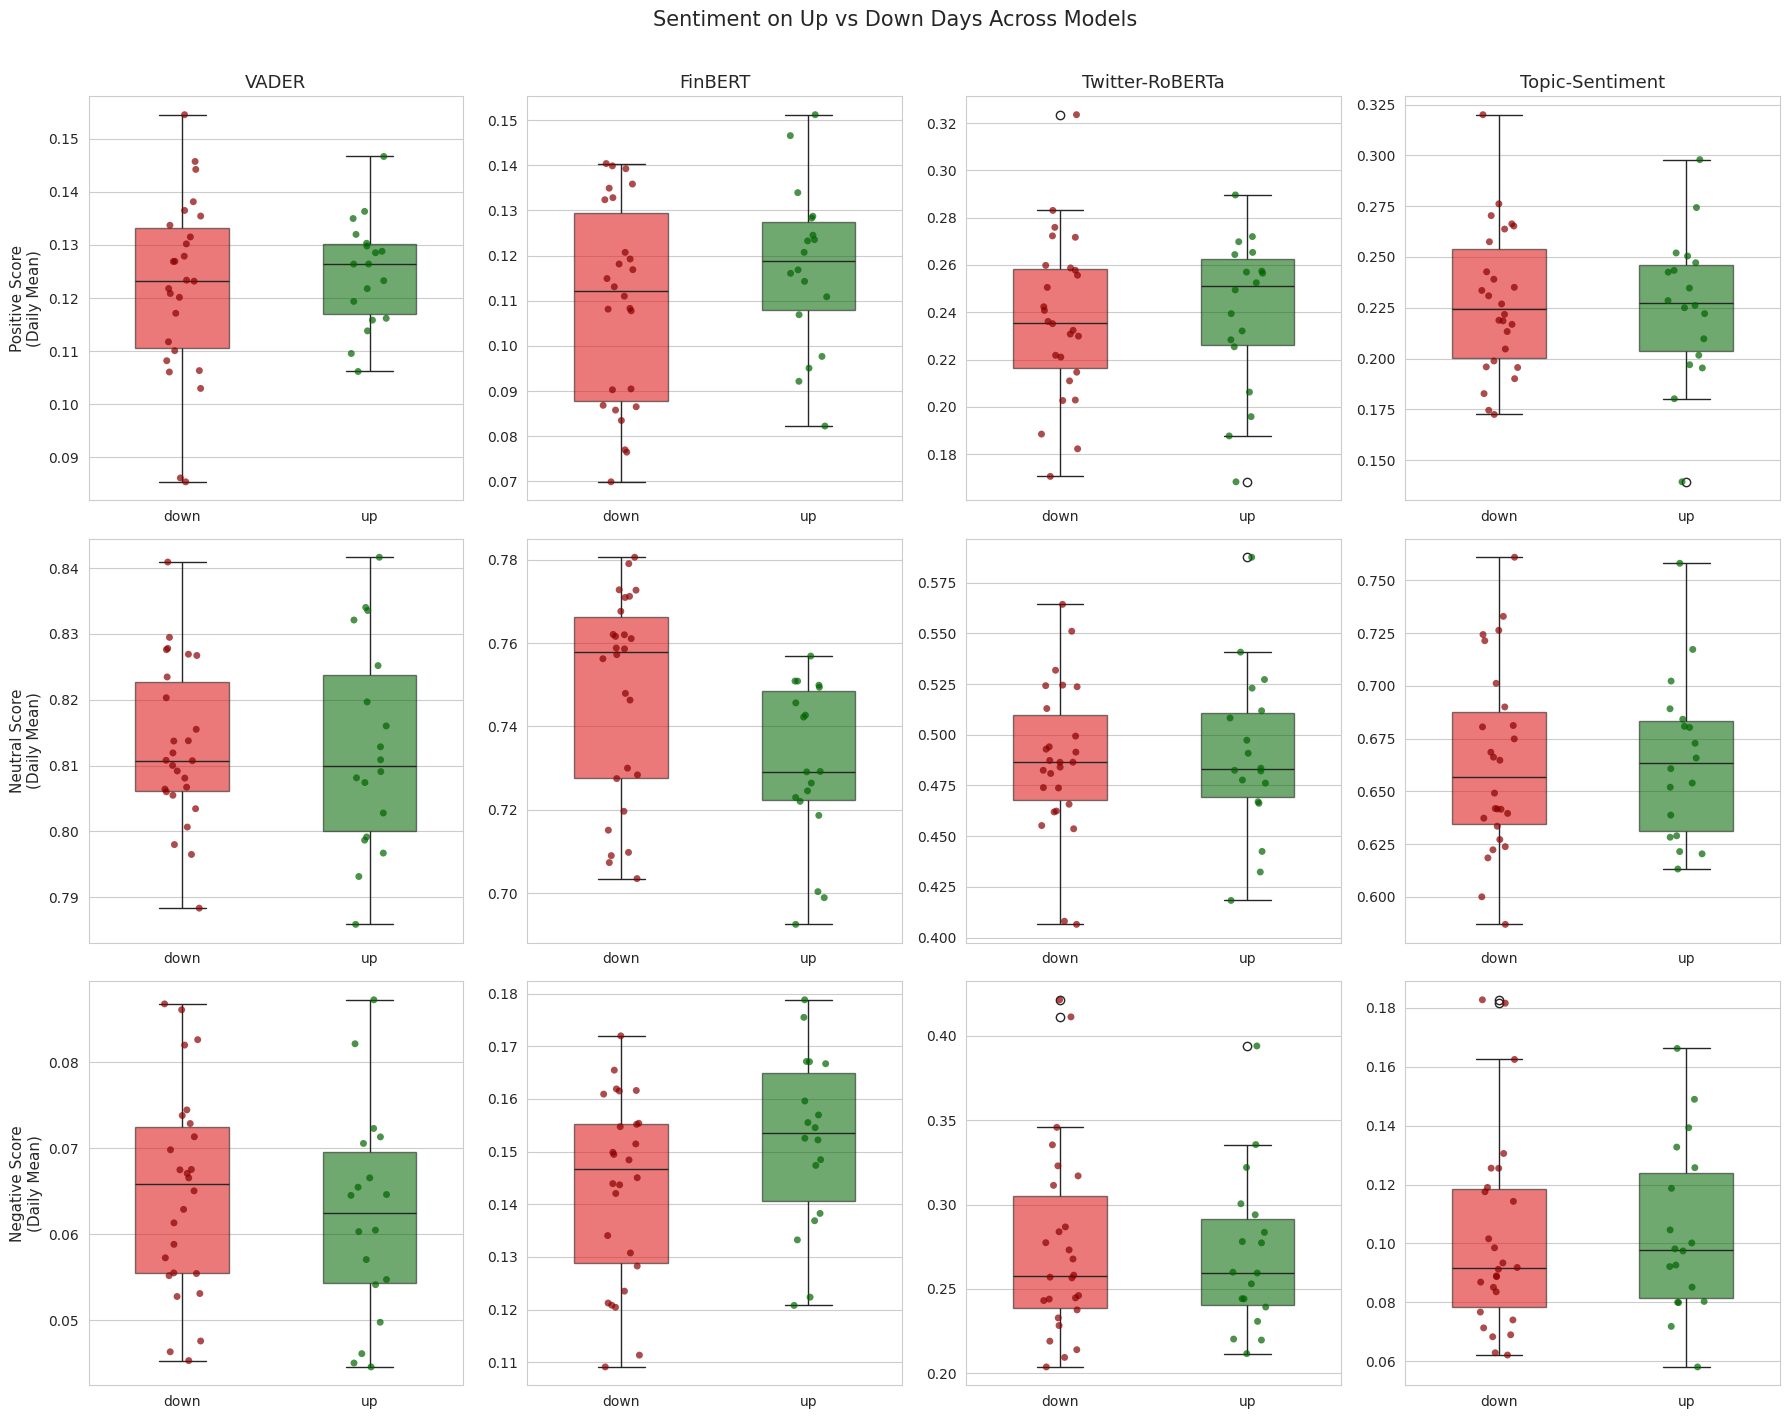

In [27]:
# Section 3

# Sentiment by Direction — All Scores Across Models
fig, axes = plt.subplots(3, 4, figsize=(18, 14))

models = [
    ("VADER", "vader_pos_mean", "vader_neu_mean", "vader_neg_mean"),
    ("FinBERT", "finbert_pos_mean", "finbert_neu_mean", "finbert_neg_mean"),
    ("Twitter-RoBERTa", "roberta_pos_mean", "roberta_neu_mean", "roberta_neg_mean"),
    ("Topic-Sentiment", "topic_pos_mean", "topic_neu_mean", "topic_neg_mean"),
]

row_labels = ["Positive", "Neutral", "Negative"]

for col_idx, (name, pos_col, neu_col, neg_col) in enumerate(models):
    for row_idx, col in enumerate([pos_col, neu_col, neg_col]):
        ax = axes[row_idx, col_idx]
        sns.boxplot(
            data=df_daily, x="Direction", y=col, order=["down", "up"],
            hue="Direction", hue_order=["down", "up"],
            palette={"down": "red", "up": "green"}, width=0.5,
            boxprops=dict(alpha=0.6), legend=False, ax=ax
        )
        sns.stripplot(
            data=df_daily, x="Direction", y=col, order=["down", "up"],
            hue="Direction", hue_order=["down", "up"],
            palette={"down": "darkred", "up": "darkgreen"}, size=5,
            alpha=0.7, jitter=True, legend=False, ax=ax
        )
        ax.set_xlabel("")

        # Column titles on top row only
        if row_idx == 0:
            ax.set_title(name, fontsize=13)

        # Row labels on left column only
        if col_idx == 0:
            ax.set_ylabel(f"{row_labels[row_idx]} Score\n(Daily Mean)", fontsize=11)
        else:
            ax.set_ylabel("")

plt.suptitle("Sentiment on Up vs Down Days Across Models", fontsize=15, y=1.01)
fig.tight_layout()
plt.show()

Section 4:

This correlation heatmap shows the correlations between all positive, neutral, and negative daily mean scores across the four sentiment models. The diverging color scale (red for negative correlation, blue for positive) and annotated values show which models measure similar signal and which capture distinct information. I can use this information to determine whether combining multiple models in a training set adds unique information or introduces redundancy.

Twitter-RoBERTa and Topic-Sentiment are highly correlated across all score types. This is not surprising given that they share the same RoBERTa base architecture and social media training domain. Using both in a model adds redundancy more than unique signal. VADER stands out as the most distinct model. Its neutral score shows near-zero correlation with most transformer model features. This confirms that a rule-based approach captures fundamentally different information from a transformer. FinBERT shows moderate correlations with both VADER and Twitter-RoBERTa, likely reflecting its unique financial training domain. The key implication for modeling is that the most informative combination would be VADER, FinBERT, and one of the social media models (RoBERTa or Topic-Sentiment), as this maximizes the diversity of perspectives while minimizing feature redundancy.

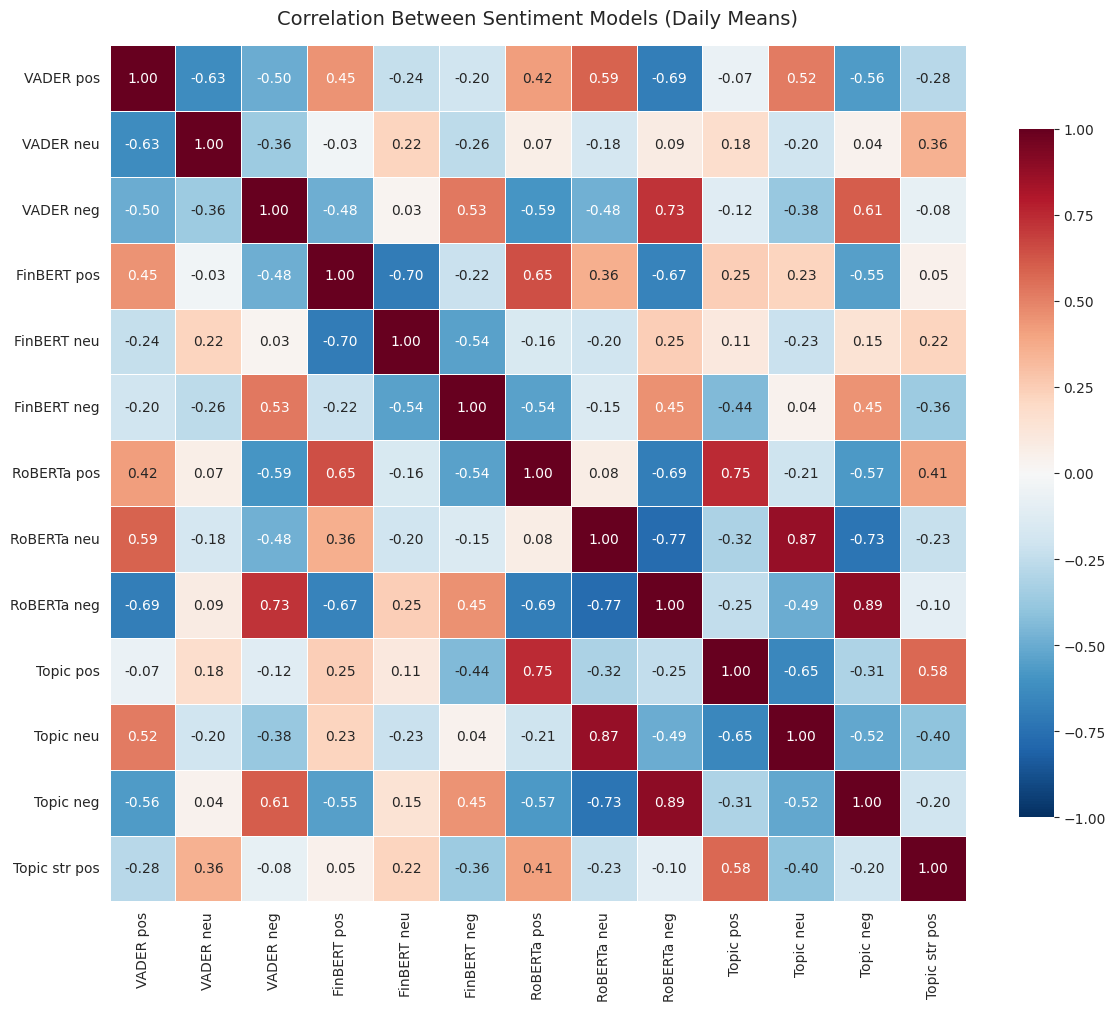

In [28]:
# Sectoion 4

# Model Agreement — Correlation Heatmap
corr_features = {
    "vader_pos_mean": "VADER pos",
    "vader_neu_mean": "VADER neu",
    "vader_neg_mean": "VADER neg",
    "finbert_pos_mean": "FinBERT pos",
    "finbert_neu_mean": "FinBERT neu",
    "finbert_neg_mean": "FinBERT neg",
    "roberta_pos_mean": "RoBERTa pos",
    "roberta_neu_mean": "RoBERTa neu",
    "roberta_neg_mean": "RoBERTa neg",
    "topic_pos_mean": "Topic pos",
    "topic_neu_mean": "Topic neu",
    "topic_neg_mean": "Topic neg",
    "topic_strong_pos_mean": "Topic str pos",
}

corr_df = df_daily[list(corr_features.keys())].rename(columns=corr_features)
corr_matrix = corr_df.corr()

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    ax=ax
)

ax.set_title("Correlation Between Sentiment Models (Daily Means)", fontsize=14, pad=15)
fig.tight_layout()
plt.show()

Section 5:

The first chart displays the top 10 emotions detected by the GoEmotions model across all r/wallstreetbets posts, ranked by average daily score. The second chart is a heatmap showing the average score for all 28 emotions on down versus up days, with a difference column (up minus down) sorted by absolute magnitude. These charts outline the emotional topology of r/wallstreetbets during the sampled period and identify which emotions differentiate up and down trading days.

Expectidly, neutral dominates the emotional landscape at approximately 0.65, mirroring the pattern observed with VADER and FinBERT. After neutral, approval and annoyance are the most prevalent emotions. This makes sense for a community that simultaneously cheerleads its members and rages at institutional players. The up vs. down heatmap reveals little difference between classes, but, there are some interesting qualitative patterns. Up days show higher levels of approval, realization, confusion, and surprise, while down days show higher levels of love, gratitude, anger, and excitement. Love and gratitude on down days likely reflect the solidarity culture of r/wallstreetbets, where members express loyalty and thank each other for holding through losses. This demonstrates that GoEmotions captures culturally specific emotional dynamics that positive/negative/neutral models miss.

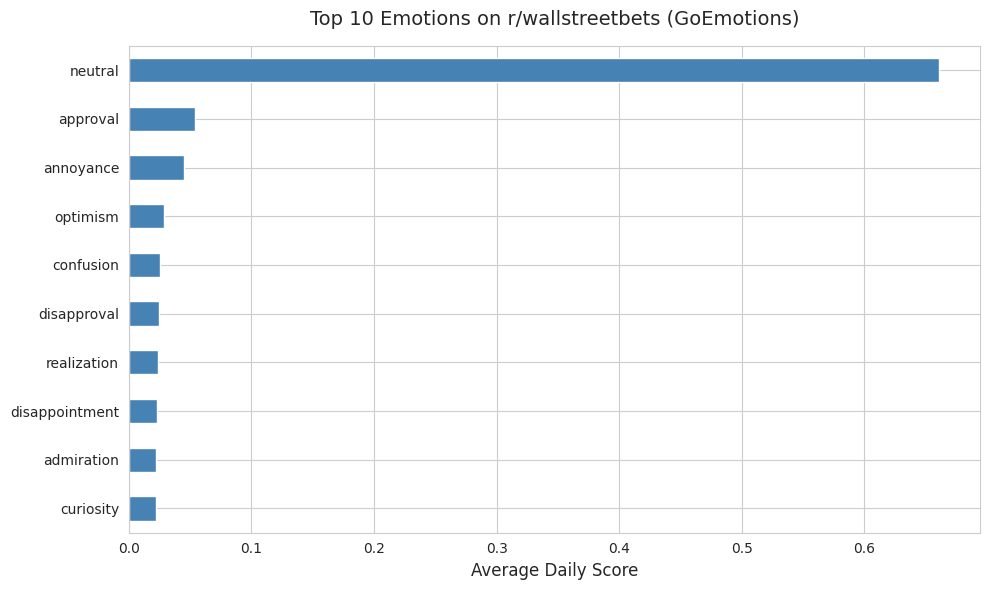

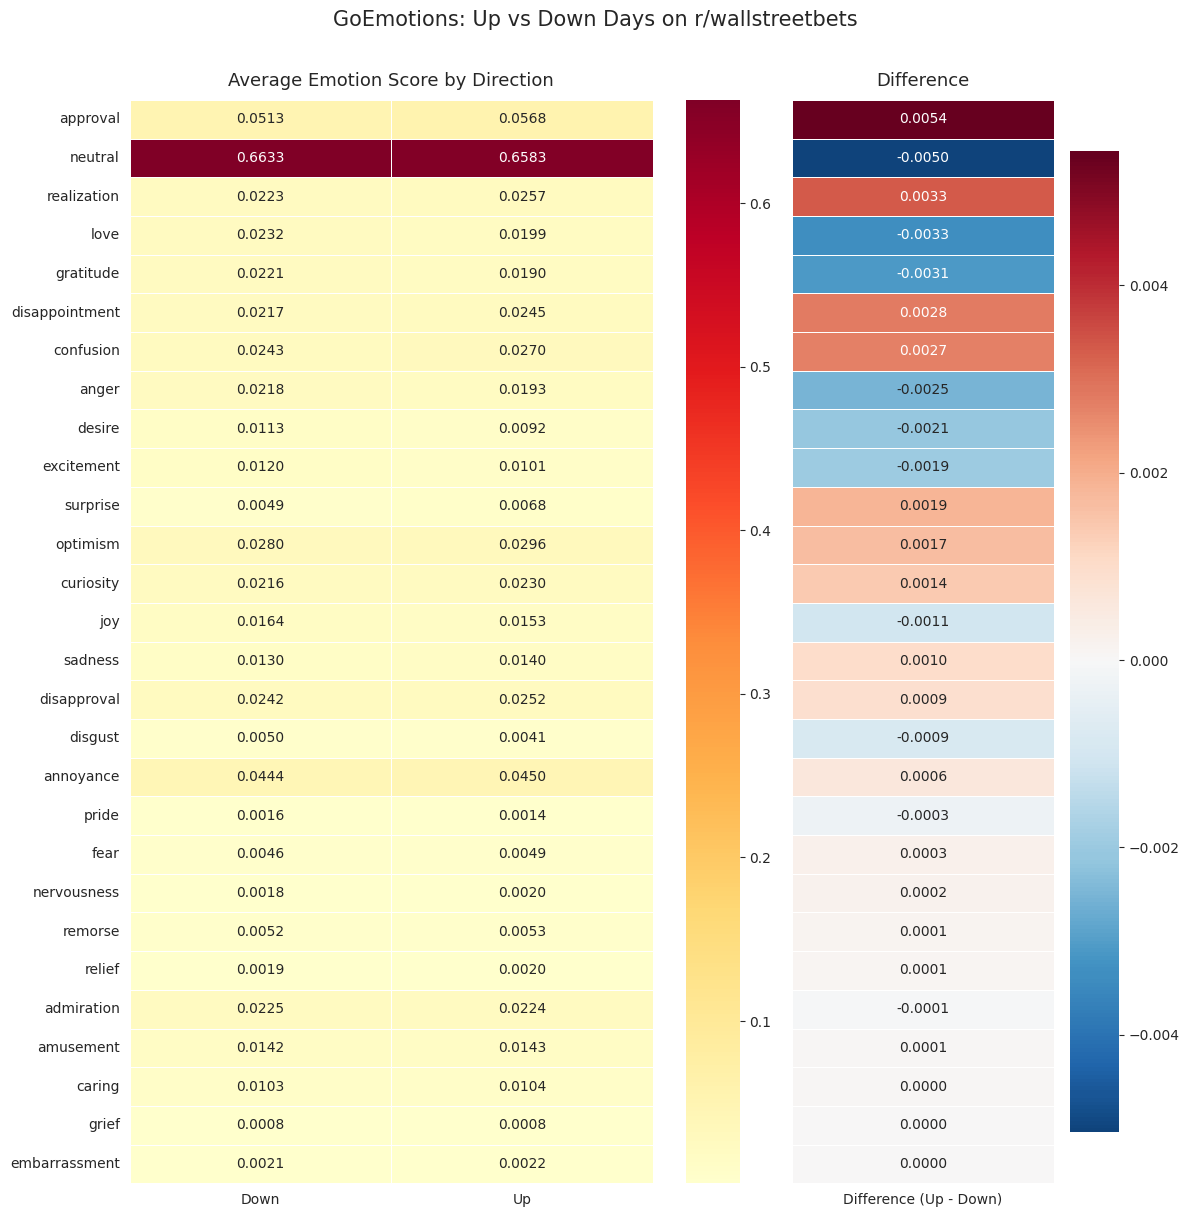

In [29]:
# Section 5

# GoEmotions Profile
emotion_cols = [c for c in df_daily.columns if c.startswith("emo_") and c.endswith("_mean")]
emotion_labels = [c.replace("emo_", "").replace("_mean", "") for c in emotion_cols]


# Top 10 Emotions by Average Score
avg_emotions = df_daily[emotion_cols].mean().sort_values(ascending=False)
avg_emotions.index = [c.replace("emo_", "").replace("_mean", "") for c in avg_emotions.index]
top_10 = avg_emotions.head(10)

fig, ax = plt.subplots(figsize=(10, 6))
top_10.sort_values().plot.barh(ax=ax, color="steelblue", edgecolor="white")
ax.set_xlabel("Average Daily Score", fontsize=12)
ax.set_ylabel("")
ax.set_title("Top 10 Emotions on r/wallstreetbets (GoEmotions)", fontsize=14, pad=15)
fig.tight_layout()
plt.show()


# Emotion Heatmap — Up vs Down Days
down_means = df_daily[df_daily["Direction"] == "down"][emotion_cols].mean()
up_means = df_daily[df_daily["Direction"] == "up"][emotion_cols].mean()

heatmap_df = pd.DataFrame({
    "Down": down_means.values,
    "Up": up_means.values,
    "Difference (Up - Down)": up_means.values - down_means.values
}, index=emotion_labels)

# Sort by absolute difference
heatmap_df = heatmap_df.reindex(heatmap_df["Difference (Up - Down)"].abs().sort_values(ascending=False).index)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12), gridspec_kw={"width_ratios": [2, 1]})

# Left panel: Up and Down means
sns.heatmap(
    heatmap_df[["Down", "Up"]],
    annot=True,
    fmt=".4f",
    cmap="YlOrRd",
    linewidths=0.5,
    ax=ax1
)
ax1.set_title("Average Emotion Score by Direction", fontsize=13, pad=10)
ax1.set_ylabel("")

# Right panel: Difference
sns.heatmap(
    heatmap_df[["Difference (Up - Down)"]],
    annot=True,
    fmt=".4f",
    cmap="RdBu_r",
    center=0,
    linewidths=0.5,
    ax=ax2
)
ax2.set_title("Difference", fontsize=13, pad=10)
ax2.set_ylabel("")
ax2.set_yticklabels([])

plt.suptitle("GoEmotions: Up vs Down Days on r/wallstreetbets", fontsize=15, y=1.01)
fig.tight_layout()
plt.show()

Section 6:

This horizontal bar chart ranks the top 20 features by their absolute correlation with GME's daily net price movement. Features are colored blue for positive correlation and red for negative correlation. This analysis identifies which features have the strongest linear relationship with the target variable and provides an initial guess on which features will be most useful for classification.

FinBERT neutral emerges as the single strongest predictor, with higher neutral sentiment correlating with downward price movement. This aligns with the observation from Section 3 that language on down days registers as neutral. VADER positive and VADER neutral rank second and third, demonstrating that VADER carries meaningful signal despite showing heavy overlap in Section 3. FinBERT appears five times in the top 20: neutral mean, positive mean, neutral std, positive std, negative std. It is by far the most consistently correlated model overall, suggesting that financial-speciffic training matters for predictions. GoEmotions features also appear prominently, with approval, realization, and surprise among the top features. Notably, average word length ranks in the top 6, with shorter words correlating with upward movement,possibly reflecting more casual, celebratory language like "moon" or "hold" on up days versus longer posts on down days.

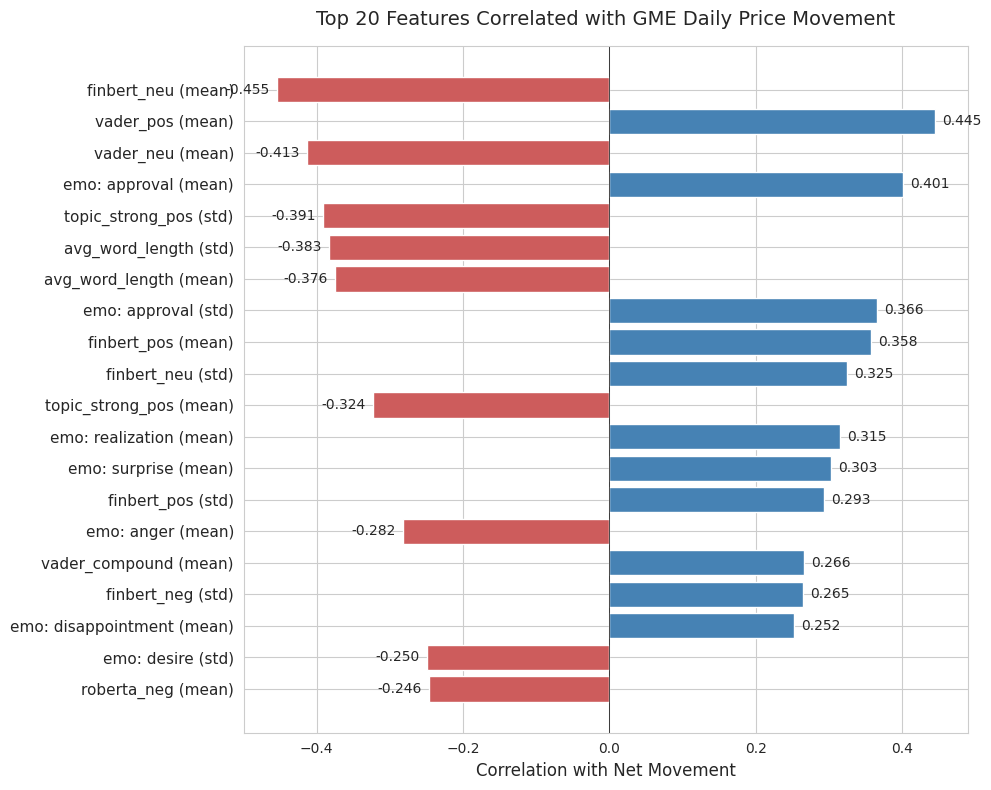

In [30]:
# Section 6

# Feature Correlation with Net_Movement
exclude_cols = ["Date", "Direction", "Net_Movement", "post_count"]
feature_cols = [c for c in df_daily.columns if c not in exclude_cols and df_daily[c].dtype in ["float64", "int64"]]

# Compute correlations with Net_Movement
correlations = df_daily[feature_cols].corrwith(df_daily["Net_Movement"]).sort_values(key=abs, ascending=False)

# Top 20
top_20 = correlations.head(20)

# Readable labels
labels = top_20.index.str.replace("_mean", " (mean)").str.replace("_std", " (std)").str.replace("emo_", "emo: ")
colors = ["steelblue" if v > 0 else "indianred" for v in top_20.values]

fig, ax = plt.subplots(figsize=(10, 8))

bars = ax.barh(range(len(top_20)), top_20.values, color=colors, edgecolor="white")
ax.set_yticks(range(len(top_20)))
ax.set_yticklabels(labels, fontsize=11)
ax.invert_yaxis()
ax.set_xlabel("Correlation with Net Movement", fontsize=12)
ax.set_title("Top 20 Features Correlated with GME Daily Price Movement", fontsize=14, pad=15)
ax.axvline(x=0, color="black", linewidth=0.5)

# Annotate bars with correlation values
for i, (val, bar) in enumerate(zip(top_20.values, bars)):
    offset = 0.01 if val > 0 else -0.01
    ha = "left" if val > 0 else "right"
    ax.text(val + offset, i, f"{val:.3f}", va="center", ha=ha, fontsize=10)

fig.tight_layout()
plt.show()

Section 7:

This horizontal bar chart compares the correlation between net price movement for each sentiment feature under two aggregation strategies. The blue bars show the unweighted daily means, and the orange bars show the daily means weighted by upvote score. This chart shows whether weighting sentiment scores by post upvotes produces a better signal for prediction, under the assumption that highly upvoted posts better represent the community's overall sentiment.

Surprisingly, weighting by upvotes consistently weakens the correlation with price movement. In several cases (most notably FinBERT neutral and VADER positive), the weighted data not only reduces the correlation, but reverses its direction. This likely occurs because the most upvoted posts on r/wallstreetbets are usually memes, which are entertaining but do not reflect actual market conditions. By weighting these posts more heavily, the signal from more analytical posts is drowned out. This is an interesting finding. Engagement-weighted sentiment is significantly worse than equal-weight sentiment, indicating that the community's collective wisdom through upvotes does not align with price-predictive information.

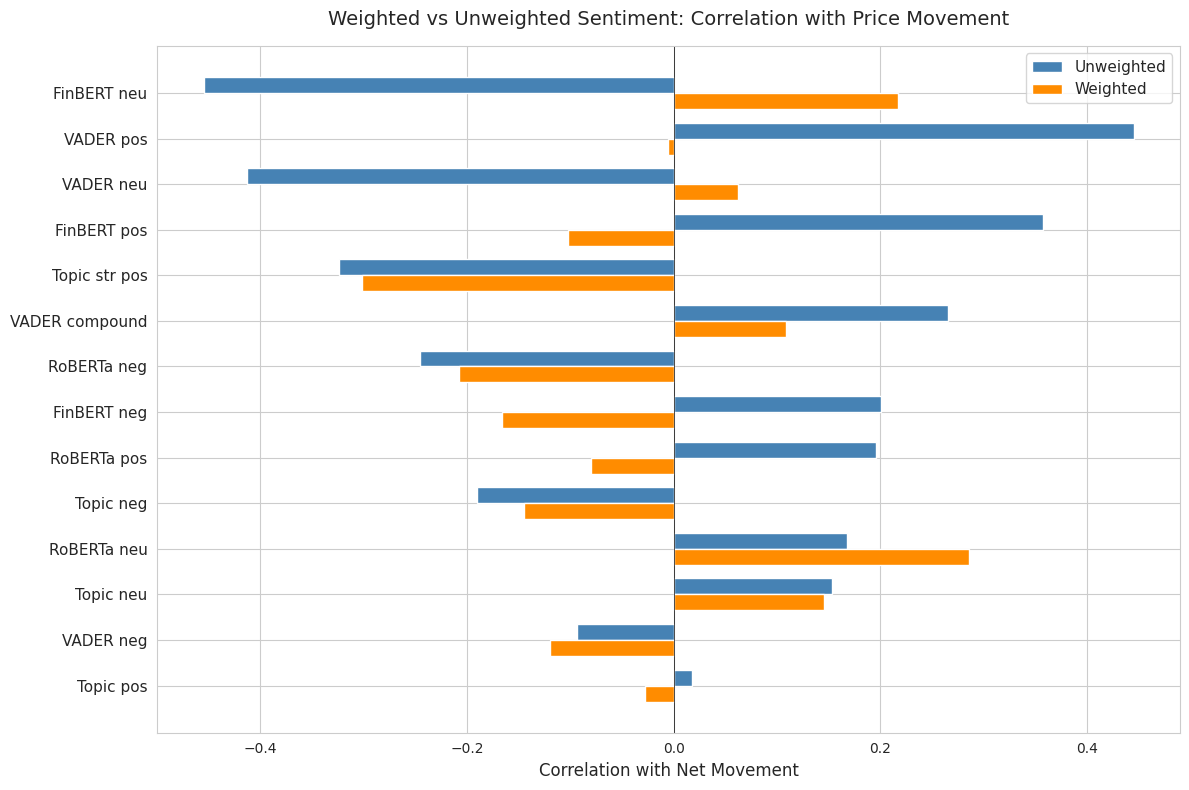

In [31]:
# Section 7:

#Weighted vs Unweighted Comparison
feature_pairs = [
    ("vader_pos_mean", "vader_pos_wmean", "VADER pos"),
    ("vader_neu_mean", "vader_neu_wmean", "VADER neu"),
    ("vader_neg_mean", "vader_neg_wmean", "VADER neg"),
    ("vader_compound_mean", "vader_compound_wmean", "VADER compound"),
    ("finbert_pos_mean", "finbert_pos_wmean", "FinBERT pos"),
    ("finbert_neu_mean", "finbert_neu_wmean", "FinBERT neu"),
    ("finbert_neg_mean", "finbert_neg_wmean", "FinBERT neg"),
    ("roberta_pos_mean", "roberta_pos_wmean", "RoBERTa pos"),
    ("roberta_neu_mean", "roberta_neu_wmean", "RoBERTa neu"),
    ("roberta_neg_mean", "roberta_neg_wmean", "RoBERTa neg"),
    ("topic_pos_mean", "topic_pos_wmean", "Topic pos"),
    ("topic_neu_mean", "topic_neu_wmean", "Topic neu"),
    ("topic_neg_mean", "topic_neg_wmean", "Topic neg"),
    ("topic_strong_pos_mean", "topic_strong_pos_wmean", "Topic str pos"),
]

# Compute correlations
unweighted_corrs = []
weighted_corrs = []
labels = []

for uw_col, w_col, label in feature_pairs:
    unweighted_corrs.append(df_daily[uw_col].corr(df_daily["Net_Movement"]))
    weighted_corrs.append(df_daily_weighted[w_col].corr(df_daily_weighted["Net_Movement"]))
    labels.append(label)

comp_df = pd.DataFrame({
    "Unweighted": unweighted_corrs,
    "Weighted": weighted_corrs,
    "Label": labels
})

# Sort by absolute unweighted correlation
comp_df["abs_uw"] = comp_df["Unweighted"].abs()
comp_df = comp_df.sort_values("abs_uw", ascending=True).drop(columns="abs_uw")

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

y = np.arange(len(comp_df))
bar_height = 0.35

ax.barh(y + bar_height / 2, comp_df["Unweighted"], bar_height, label="Unweighted", color="steelblue", edgecolor="white")
ax.barh(y - bar_height / 2, comp_df["Weighted"], bar_height, label="Weighted", color="darkorange", edgecolor="white")

ax.set_yticks(y)
ax.set_yticklabels(comp_df["Label"], fontsize=11)
ax.set_xlabel("Correlation with Net Movement", fontsize=12)
ax.set_title("Weighted vs Unweighted Sentiment: Correlation with Price Movement", fontsize=14, pad=15)
ax.axvline(x=0, color="black", linewidth=0.5)
ax.legend(fontsize=11)

fig.tight_layout()
plt.show()